In [1]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_absolute_error
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors,metrics
import pickle
import collections

In [2]:
  X_uni = loadmat('PaviaU.mat')['paviaU']
  y_uni = loadmat('PaviaU_gt.mat')['paviaU_gt']
  names_uni = ['Asphalt','Meadows','Gravel','Trees','Painted metal sheets','Bare Soil','Bitumen',
               'Self-Blocking Bricks','Shadows']


In [4]:
X_uni.shape

(610, 340, 103)

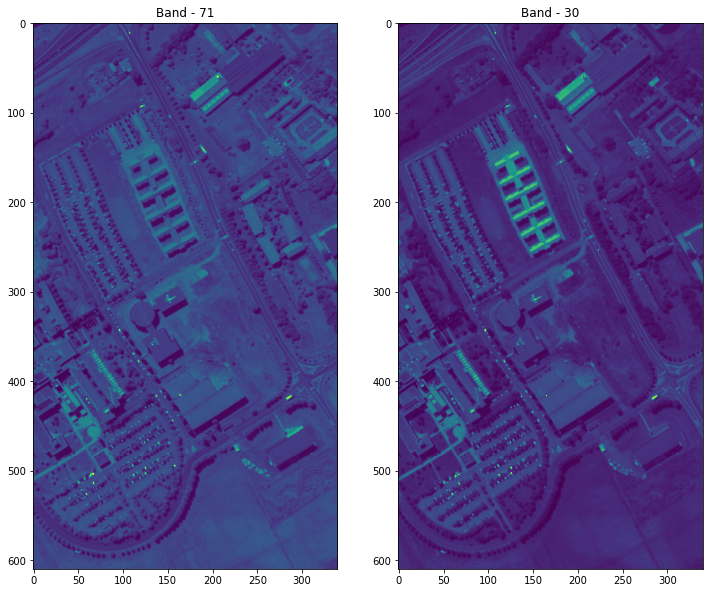

In [3]:
fig = plt.figure(figsize = (12, 24))

for i in range(1,3):
  fig.add_subplot(1,2,i)
  band= np.random.randint(X_uni.shape[2])
  plt.imshow(X_uni[:,:,band])
  plt.title(f'Band - {band}')

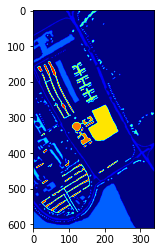

In [4]:
imgplot = plt.imshow(y_uni, cmap='jet')

## REDUCCIÓN DIMENSIONALIDAD

In [5]:
dt = X_uni.reshape(-1, X_uni.shape[2])
df = pd.DataFrame(data = dt)
df = pd.concat([df, pd.DataFrame(data = y_uni.ravel())], axis = 1) #concatenamos df, que es la imagen normal convertida a DataFrame con y, que son los datos de salida(resultados). 
                                                               #El .ravel lo que hace es transofrmar y (145x145) a un array de una dimension (145x1)
df.columns= [f'band{i}' for i in range(1, 1+X_uni.shape[2])]+['class']
df.to_csv('Dataset.csv')
df.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band95,band96,band97,band98,band99,band100,band101,band102,band103,class
0,647,499,464,371,291,319,365,322,296,305,...,3416,3335,3256,3226,3205,3210,3221,3238,3250,0
1,604,546,527,455,378,377,336,314,324,329,...,2583,2538,2509,2511,2501,2468,2442,2464,2528,0
2,621,746,556,360,285,300,274,276,332,319,...,2288,2242,2193,2202,2225,2266,2308,2345,2361,0
3,637,592,482,556,508,284,178,198,193,224,...,2675,2609,2541,2551,2571,2569,2573,2620,2644,0
4,625,560,480,360,377,341,264,208,231,266,...,2392,2344,2289,2328,2415,2424,2386,2431,2456,0


In [9]:
df.shape

(207400, 104)

In [10]:
df.iloc[:, :].describe()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band95,band96,band97,band98,band99,band100,band101,band102,band103,class
count,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,...,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000
mean,925.324995,850.237584,800.363558,809.889783,830.085950,834.162700,833.530641,825.932729,823.827637,830.388689,...,2266.693293,2257.763443,2249.329595,2246.216779,2238.254364,2231.822647,2224.744884,2236.901707,2253.451692,0.707184
std,444.427499,468.464292,493.590158,527.235307,555.419089,574.543548,592.474167,605.782075,619.492506,636.532214,...,863.351557,857.286520,845.571285,833.001117,826.922155,827.403828,827.257369,834.092348,844.165146,1.753377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,145.000000,146.000000,150.000000,140.000000,0.000000,134.000000,0.000000,0.000000
25%,649.000000,555.000000,483.000000,473.000000,480.000000,474.000000,461.000000,444.000000,433.000000,430.000000,...,1699.000000,1693.000000,1690.000000,1696.000000,1692.000000,1685.000000,1675.000000,1682.000000,1692.000000,0.000000
50%,857.000000,762.000000,694.000000,690.000000,693.000000,681.000000,671.000000,661.000000,657.000000,658.000000,...,2252.000000,2244.000000,2236.000000,2238.000000,2235.000000,2231.000000,2226.000000,2244.000000,2261.000000,0.000000
75%,1111.000000,1046.000000,1015.000000,1036.000000,1058.000000,1066.000000,1068.000000,1064.000000,1066.000000,1080.000000,...,2730.000000,2721.000000,2711.000000,2701.000000,2688.000000,2683.000000,2677.000000,2692.000000,2715.000000,0.000000
max,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,9.000000


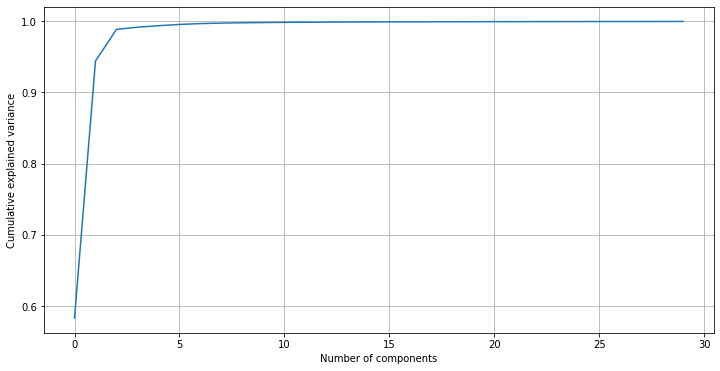

In [6]:
n=30
pca = PCA(n)

principalComponents = pca.fit_transform(df.iloc[:, :-1].values) #Para realizar el PCA quitamos la columna de clases o resultados, puesto que lo que queremos es reducir las bandas

ev=pca.explained_variance_ratio_

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(ev))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

In [7]:
n=5
pca = PCA(n)
dt = pca.fit_transform(df.iloc[:, :-1].values) 
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y_uni.ravel())], axis = 1) #Una vez realizada la reducción de dimensionalidad volvemos a anexar las clases o resultados.
q.columns = [f'PC-{i}' for i in range(1,n+1)]+['class'] #q será el Dataframe de la imagen original pero en vez de con 200 bandas con las 40 del PCA
q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,class
0,-5150.190044,6795.052770,1532.351461,410.030134,-259.856157,0
1,-6082.245760,3158.592195,1463.194744,154.617093,-438.871878,0
2,-7214.505405,1158.875812,1400.817899,410.044063,38.052916,0
3,-6566.279360,3398.894763,1126.024772,496.775042,-302.415250,0
4,-6496.967970,2154.797771,1035.954575,27.247705,-194.891403,0


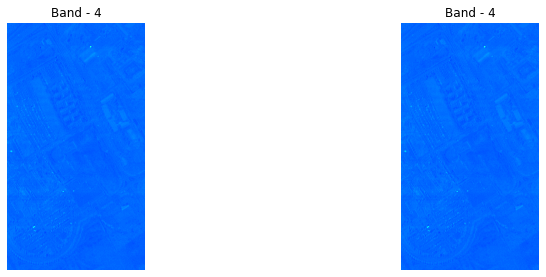

In [8]:
fig = plt.figure(figsize = (20, 10))

for i in range(1, 3):
  
    fig.add_subplot(2,3, i)
    comp = np.random.randint(q.shape[1])
    plt.imshow(q.loc[:, f'PC-{comp}'].values.reshape(X_uni.shape[0], X_uni.shape[1]),cmap='jet')
    plt.axis('off')
    plt.title(f'Band - {comp}')

In [8]:
x = q[q['class'] != 0] #quitamos las filas cuyo resultado supervisado es 0 puesto que no pertenece a ninguna clase.
X = x.iloc[:, :-1].values
y = x.loc[:, 'class'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11, stratify=y)

In [19]:
x.shape

(42776, 6)

# ALGORITMOS DE CLASIFICACION

##SVM

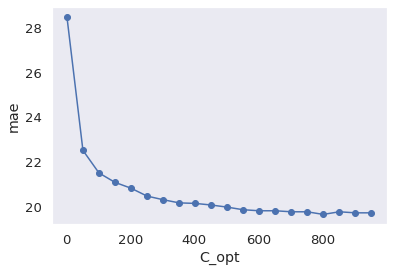

In [34]:
mae = []
for i in range(2, 1000,50):
    svm =  SVC(kernel = 'rbf', C = i).fit(X_train, y_train)
    ypred = svm.predict(X_test)
    maev = mean_absolute_error(y_test,ypred)
    mae.append(maev)

# Plot mae   
plt.plot(range(2,1000,50), mae, marker='o')
plt.xlabel('C_opt')
plt.ylabel('mae')
plt.grid()
plt.show()

In [35]:
svm =  SVC(kernel = 'rbf', C = 800).fit(X_train, y_train)
ypred = svm.predict(X_test)

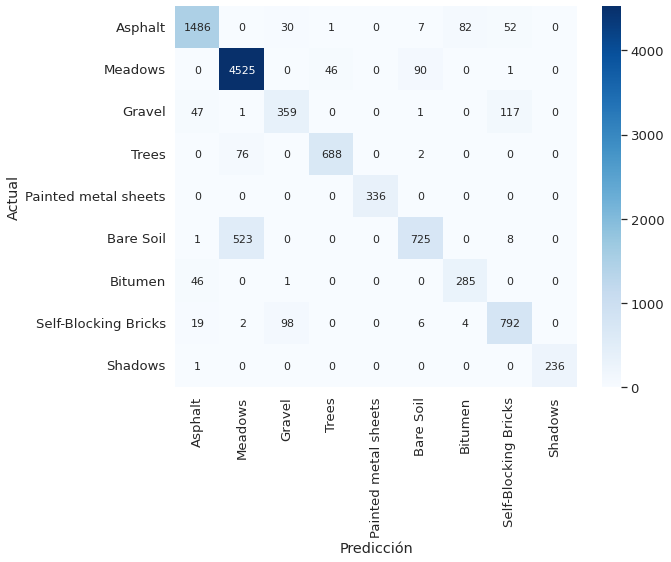

In [11]:
data = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns=names_uni, index = names_uni)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicción'
plt.figure(figsize = (9,7))
sn.set(font_scale=1.2)
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 11}, fmt='d')

In [12]:
print(classification_report(y_test, ypred, target_names = names_uni))

                      precision    recall  f1-score   support

             Asphalt       0.93      0.90      0.91      1658
             Meadows       0.88      0.97      0.92      4662
              Gravel       0.74      0.68      0.71       525
               Trees       0.94      0.90      0.92       766
Painted metal sheets       1.00      1.00      1.00       336
           Bare Soil       0.87      0.58      0.69      1257
             Bitumen       0.77      0.86      0.81       332
Self-Blocking Bricks       0.82      0.86      0.84       921
             Shadows       1.00      1.00      1.00       237

            accuracy                           0.88     10694
           macro avg       0.88      0.86      0.87     10694
        weighted avg       0.88      0.88      0.88     10694



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


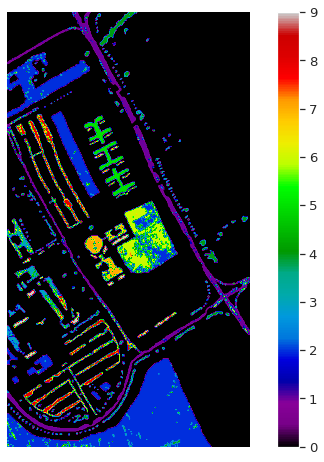

In [14]:
l=[]
for i in range(q.shape[0]):
  if q.iloc[i, -1] == 0:
    l.append(0)
  else:
    l.append(svm.predict(q.iloc[i, :-1].values.reshape(1, -1)))

clmap = np.array(l).reshape(610, 340).astype('float')
plt.figure(figsize=(10, 8))
plt.imshow(clmap, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
#plt.savefig('IP_cmap.png')
plt.show()

## Decision Trees

In [15]:
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[8,9,10,11,12,13,14,16,18,20], 'splitter':['best','random']}
model = DecisionTreeClassifier()
grid = GridSearchCV(model, parameters)
grid.fit(X_train, y_train)
predicted = grid.predict(X_test)
acc = accuracy_score(y_test, predicted)
print('Acc', acc)
print(grid.best_params_)

Acc 0.8490742472414438
{'criterion': 'gini', 'max_depth': 13, 'splitter': 'best'}


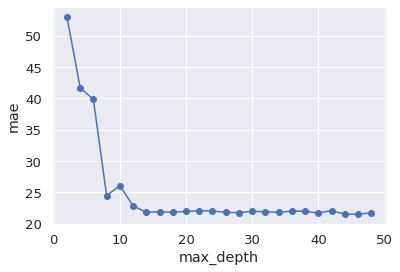

In [16]:
mae = []
for i in range(2, 50, 2):
    model = DecisionTreeClassifier(criterion='gini', max_depth=i, splitter='best').fit(X_train, y_train)
    ypred = model.predict(X_test)
    maev = mean_absolute_error(y_test,ypred)
    mae.append(maev)

# Plot mae   
plt.plot(range(2,50,2), mae, marker='o')
plt.xlabel('max_depth')
plt.ylabel('mae')
plt.show()


In [17]:
model = DecisionTreeClassifier(criterion='gini', max_depth=13, random_state=0).fit(X_train, y_train)
ypred = model.predict(X_test)

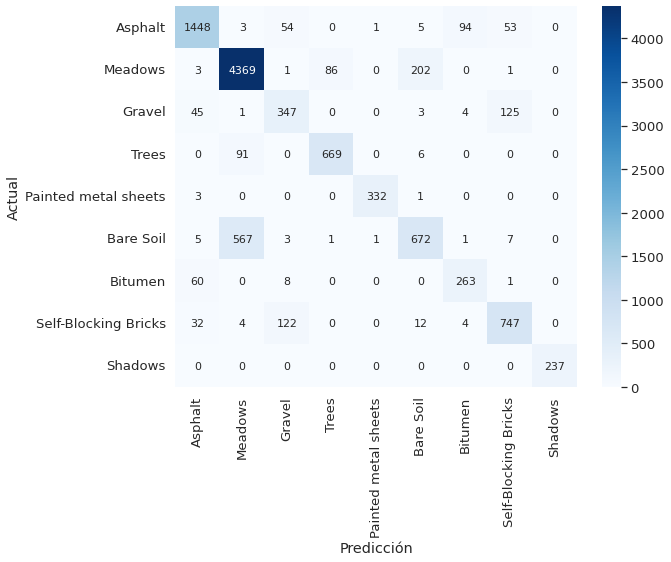

In [18]:
data = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns=names_uni, index = names_uni)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicción'
plt.figure(figsize = (9,7))
sn.set(font_scale=1.2)
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 11}, fmt='d')

In [20]:
print(classification_report(y_test, ypred, target_names = names_uni))

                      precision    recall  f1-score   support

             Asphalt       0.91      0.87      0.89      1658
             Meadows       0.87      0.94      0.90      4662
              Gravel       0.65      0.66      0.65       525
               Trees       0.88      0.87      0.88       766
Painted metal sheets       0.99      0.99      0.99       336
           Bare Soil       0.75      0.53      0.62      1257
             Bitumen       0.72      0.79      0.75       332
Self-Blocking Bricks       0.80      0.81      0.81       921
             Shadows       1.00      1.00      1.00       237

            accuracy                           0.85     10694
           macro avg       0.84      0.83      0.83     10694
        weighted avg       0.85      0.85      0.85     10694



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


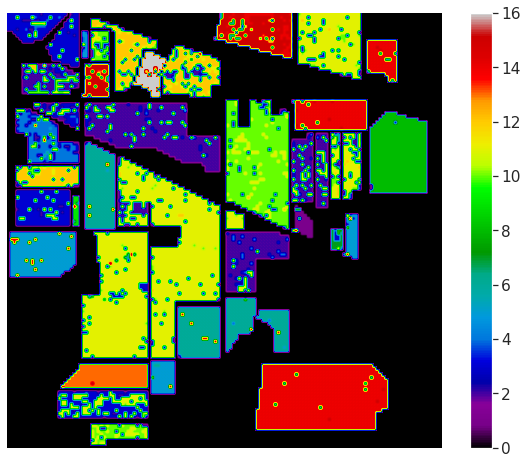

In [ ]:
l=[]
for i in range(q.shape[0]):
  if q.iloc[i, -1] == 0:
    l.append(0)
  else:
    l.append(model.predict(q.iloc[i, :-1].values.reshape(1, -1)))

clmap = np.array(l).reshape(145, 145).astype('float')
plt.figure(figsize=(10, 8))
plt.imshow(clmap, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
#plt.savefig('IP_cmap.png')
plt.show()

##KNN

In [22]:
parameters = {'weights':('uniform', 'distance'), 'algorithm':('auto', 'brute', 'ball_tree', 'kd_tree'), 'n_neighbors':[5,6,7,8,9,10,11,12,13,14], 'metric':['euclidean','manhattan']}
knn = neighbors.KNeighborsClassifier()
grid = GridSearchCV(knn, parameters)
grid.fit(X_train, y_train)
predicted = grid.predict(X_test)
acc = accuracy_score(y_test, predicted)
print('Acc', acc)
print(grid.best_params_)

Acc 0.8702075930428278
{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}


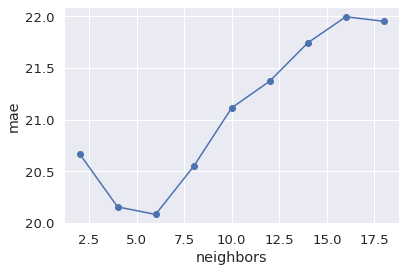

In [23]:
mae = []
for i in range(2, 20, 2):
    knn = neighbors.KNeighborsClassifier(i, weights='distance', algorithm='auto', metric='euclidean').fit(X_train, y_train)
    ypred = knn.predict(X_test)
    maev = mean_absolute_error(y_test,ypred)
    mae.append(maev)

# Plot mae   
plt.plot(range(2,20,2), mae, marker='o')
plt.xlabel('neighbors')
plt.ylabel('mae')
plt.show()


In [30]:
knn = neighbors.KNeighborsClassifier(10, weights='distance', algorithm='auto', metric='manhattan').fit(X_train, y_train)
ypred = knn.predict(X_test)

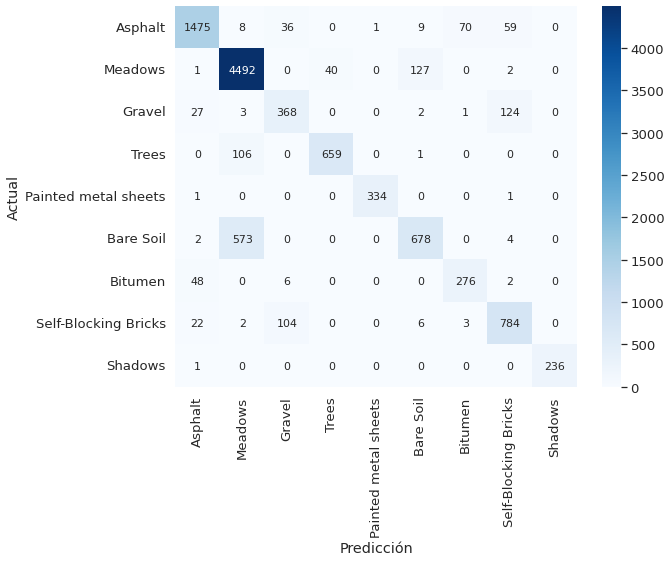

In [31]:
data = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns=names_uni, index = names_uni)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicción'
plt.figure(figsize = (9,7))
sn.set(font_scale=1.2)
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 11}, fmt='d')

In [32]:
print(classification_report(y_test, ypred, target_names = names_uni))

                      precision    recall  f1-score   support

             Asphalt       0.94      0.89      0.91      1658
             Meadows       0.87      0.96      0.91      4662
              Gravel       0.72      0.70      0.71       525
               Trees       0.94      0.86      0.90       766
Painted metal sheets       1.00      0.99      1.00       336
           Bare Soil       0.82      0.54      0.65      1257
             Bitumen       0.79      0.83      0.81       332
Self-Blocking Bricks       0.80      0.85      0.83       921
             Shadows       1.00      1.00      1.00       237

            accuracy                           0.87     10694
           macro avg       0.87      0.85      0.86     10694
        weighted avg       0.87      0.87      0.86     10694



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


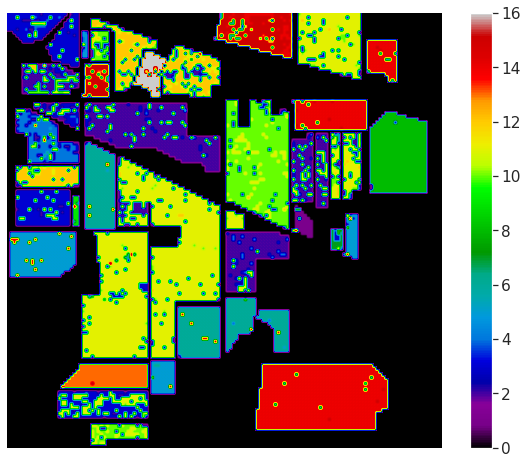

In [ ]:
l=[]
for i in range(q.shape[0]):
  if q.iloc[i, -1] == 0:
    l.append(0)
  else:
    l.append(knn.predict(q.iloc[i, :-1].values.reshape(1, -1)))

clmap = np.array(l).reshape(145, 145).astype('float')
plt.figure(figsize=(10, 8))
plt.imshow(clmap, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
#plt.savefig('IP_cmap.png')
plt.show()

# REDES NEURONALES

In [9]:
import tensorflow as tf
import tensorflow_datasets as tfds
import math

In [ ]:
X_train[0].shape

(40,)

In [9]:
#Vamos probando modelos con más capas y neuronas. Empezaremos con una capa oculta. Sus neuronas las calcularemos como h=(i*o)^1/2 h=25,29
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10,input_shape=X_train[0].shape, activation='relu'),
    tf.keras.layers.Dense(17, activation='softmax')
])
modelo.summary()
modelo.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

#En el parámetro loss indicamos la función de pérdida de Cross Entropy, que es la utilizada para problemas de clasificación. 
#La función mean squared error se utiliza para problemas de regresión

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 17)                187       
                                                                 
Total params: 247
Trainable params: 247
Non-trainable params: 0
_________________________________________________________________


In [10]:
historial = modelo.fit(X_train,y_train, epochs=500)

Epoch 1/500
1003/1003 [==============================] - 2s 2ms/step - loss: 150.7479 - accuracy: 0.6001
Epoch 2/500
1003/1003 [==============================] - 2s 2ms/step - loss: 8.7111 - accuracy: 0.6823
Epoch 3/500
1003/1003 [==============================] - 1s 1ms/step - loss: 4.8620 - accuracy: 0.7027
Epoch 4/500
1003/1003 [==============================] - 1s 1ms/step - loss: 3.6466 - accuracy: 0.7104
Epoch 5/500
1003/1003 [==============================] - 1s 1ms/step - loss: 3.0757 - accuracy: 0.7148
Epoch 6/500
1003/1003 [==============================] - 1s 1ms/step - loss: 2.6070 - accuracy: 0.7147
Epoch 7/500
1003/1003 [==============================] - 1s 1ms/step - loss: 2.4443 - accuracy: 0.7139
Epoch 8/500
1003/1003 [==============================] - 1s 1ms/step - loss: 2.3545 - accuracy: 0.7129
Epoch 9/500
1003/1003 [==============================] - 1s 1ms/step - loss: 2.3170 - accuracy: 0.7146
Epoch 10/500
1003/1003 [==============================] - 1s 1ms/step -

Vemos que con una capa oculta, la accuracy máxima conseguida con 100 pasadas es de 0,81 aprox en la pasada 96. Intentamos meter más capas ocultas para mejorar los resultados.

In [10]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=8,input_shape=X_train[0].shape, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(17, activation='softmax')
])
modelo.summary()
modelo.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 48        
                                                                 
 dense_1 (Dense)             (None, 12)                108       
                                                                 
 dense_2 (Dense)             (None, 17)                221       
                                                                 
Total params: 377
Trainable params: 377
Non-trainable params: 0
_________________________________________________________________


In [11]:
historial = modelo.fit(X_train,y_train, epochs=1000, verbose=True)

Epoch 1/1000
1003/1003 [==============================] - 3s 2ms/step - loss: 32.1003 - accuracy: 0.6507
Epoch 2/1000
1003/1003 [==============================] - 2s 2ms/step - loss: 4.5399 - accuracy: 0.7219
Epoch 3/1000
1003/1003 [==============================] - 2s 2ms/step - loss: 3.5025 - accuracy: 0.7244
Epoch 4/1000
1003/1003 [==============================] - 2s 2ms/step - loss: 2.7120 - accuracy: 0.7279
Epoch 5/1000
1003/1003 [==============================] - 2s 2ms/step - loss: 2.3699 - accuracy: 0.7264
Epoch 6/1000
1003/1003 [==============================] - 2s 2ms/step - loss: 2.3359 - accuracy: 0.7259
Epoch 7/1000
1003/1003 [==============================] - 2s 2ms/step - loss: 1.9787 - accuracy: 0.7330
Epoch 8/1000
1003/1003 [==============================] - 2s 2ms/step - loss: 1.8126 - accuracy: 0.7310
Epoch 9/1000
1003/1003 [==============================] - 2s 2ms/step - loss: 1.8170 - accuracy: 0.7291
Epoch 10/1000
1003/1003 [==============================] - 2s 2

In [12]:
predicciones = modelo.predict(X_test)

In [13]:
results = modelo.evaluate(X_test, y_test)
print("test loss, test acc:", results)

335/335 [==============================] - 2s 3ms/step - loss: 0.3461 - accuracy: 0.8688
test loss, test acc: [0.3460767865180969, 0.868804931640625]


In [ ]:
ini_0=8
ini_1=12
count=0
for i in range(ini_0,ini_0+7):
  for j in range(ini_1,ini_1+10):
    count +=1
    modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=i,input_shape=X_train[0].shape, activation='relu'),
    tf.keras.layers.Dense(j, activation='relu'),
    tf.keras.layers.Dense(17, activation='softmax')
    ])
    modelo.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])
    historial = modelo.fit(X_train,y_train, epochs=1000, verbose=False)
    results = modelo.evaluate(X_test, y_test)
    print("test loss, test acc:", results, 'params->i:', i, 'j:', j, 'repetición:', count)

335/335 [==============================] - 1s 1ms/step - loss: 0.3477 - accuracy: 0.8653
test loss, test acc: [0.3476542532444, 0.8653450608253479] params->i: 8 j: 12 repetición: 1
335/335 [==============================] - 1s 1ms/step - loss: 0.5391 - accuracy: 0.8623
test loss, test acc: [0.5390875935554504, 0.8622592091560364] params->i: 8 j: 13 repetición: 2
335/335 [==============================] - 1s 1ms/step - loss: 0.3888 - accuracy: 0.8624
test loss, test acc: [0.38875725865364075, 0.8624462485313416] params->i: 8 j: 14 repetición: 3
335/335 [==============================] - 1s 1ms/step - loss: 0.3857 - accuracy: 0.8482
test loss, test acc: [0.38567304611206055, 0.848232626914978] params->i: 8 j: 15 repetición: 4
335/335 [==============================] - 1s 1ms/step - loss: 0.3444 - accuracy: 0.8662
test loss, test acc: [0.3443790674209595, 0.8661866188049316] params->i: 8 j: 16 repetición: 5
335/335 [==============================] - 1s 2ms/step - loss: 0.3385 - accuracy: 

In [ ]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=12,input_shape=X_train[0].shape, activation='relu'),
    tf.keras.layers.Dense(19, activation='relu'),
    tf.keras.layers.Dense(17, activation='softmax')
])
modelo.summary()
modelo.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])
historial = modelo.fit(X_train,y_train, epochs=1000, verbose=True)

In [ ]:
predicciones = modelo.predict(X_test)
ypred = np.argmax(predicciones, axis=1)

In [ ]:
print(classification_report(y_test, ypred, target_names = names_uni))

In [ ]:
acc = historial.history['accuracy']
loss = historial.history['loss']

epochs   = range(1,len(acc)+1,1)


fig = plt.figure()
sns.set_style('white')
ax1 = fig.add_subplot(111)
ax1.plot(epochs, acc, 'b',label = 'Accuracy')
ax1.set_ylabel('acc')
ax1.set_title('Accuracy y Loss de la Red Neuronal')
 
ax2 = ax1.twinx()  # this is the important function
ax2.plot(epochs, loss, 'r', label = 'Loss')
ax2.set_xlim([1, len(acc)+1])
ax2.set_ylabel('loss')
ax2.set_xlabel('Iteraciones')
 
leg1 = ax1.legend(loc='upper right')
leg2 = ax2.legend(loc='lower right')

